In [ ]:
from google.colab import files
files.upload()  # Upload your kaggle.json file here
# first of all from runtime change cpu to gpu




Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"usamajaved1","key":"1d1199e2374b68accd90424ce5110473"}'}

In [ ]:
!pip install kaggle



In [ ]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 23.9MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip_ref.extractall("/content")
zip_ref.close()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.applications.vgg16 import VGG16 # IMPORT A MODEL explain in reg

In [ ]:
conv_base = VGG16(
    weights ="imagenet",
    include_top = False, # mean we only use the conv base layer and remove dense layers as explain on reg
    input_shape= (150,150,3) # input shape of images
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
conv_base.summary() # we can see dense layers are removed

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# now we create our own top of model
model = Sequential()
model.add(conv_base) # we use the conv bae of vgg16 model
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
conv_base.trainable = False # we stop con_base weights from update we use as it is they are coming from imagenet

In [ ]:
# generators also done in colab notebook and on register too
# train_ds = keras.utils.image_dataset_from_directory(
#     directory = "/content/train",
#     labels = "inferred",
#     label_mode = "int",
#     image_size = (150,150)
#     batch_size = 32
# )

# test_ds = keras.utils.image_dataset_from_directory(
#     directory = "/content/test",
#     labels = "inferred",
#     label_mode = "int",
#     image_size = (150,150)
#     batch_size = 32
# )
# bcz there is overfitting so we use data generator here
train_datagen = ImageDataGenerator(
    rescale = (1./255),
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
test_datagen = ImageDataGenerator(rescale = (1./255))
train_generator = train_datagen.flow_from_directory(
    directory = "/content/train",
    batch_size = 32,
    class_mode = "binary",
    target_size = (150,150)
)

test_generator = test_datagen.flow_from_directory(
    directory = "/content/test",
    batch_size = 32,
    class_mode = "binary",
    target_size = (150,150)
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
# not used in datat augmenattaion
# # to send image to model first we have to normalize it
# # pixel values that are between 0 to 255 now comes between 0 to 1
# import tensorflow
# def process(image,label):
#   image = tensorflow.cast(image/255.,tensorflow.float32)
#   return image,label

# train_ds = train_ds.map(process)
# test_ds = test_ds.map(process)


In [ ]:
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [ ]:
# history =model.fit(train_ds,epochs = 10,validation_data= test_ds)
# for data augmentation
history =model.fit(train_generator,epochs = 10,validation_data= test_generator)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 183s 290ms/step - accuracy: 0.9277 - loss: 0.1782 - val_accuracy: 0.9158 - val_loss: 0.2111
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 181s 287ms/step - accuracy: 0.9288 - loss: 0.1668 - val_accuracy: 0.9190 - val_loss: 0.1981
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 213s 304ms/step - accuracy: 0.9356 - loss: 0.1507 - val_accuracy: 0.9170 - val_loss: 0.1963
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 184s 291ms/step - accuracy: 0.9428 - loss: 0.1447 - val_accuracy: 0.9192 - val_loss: 0.2001
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 181s 288ms/step - accuracy: 0.9403 - loss: 0.1396 - val_accuracy: 0.9124 - val_loss: 0.2322
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 288ms/step - accuracy: 0.9455 - loss: 0.1305 - val_accuracy: 0.9192 - val_loss: 0.2127
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 191s 303ms/step - accuracy: 0.9518 - loss: 0.1183 - val_accuracy: 0.9182 - val_loss: 0.2156
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 194s 290ms/step - accuracy: 0.9545 -

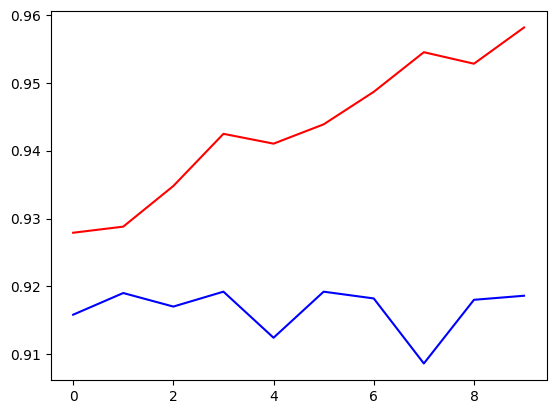

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color = "red",label = "train")
plt.plot(history.history["val_accuracy"],color = "blue",label = "test")

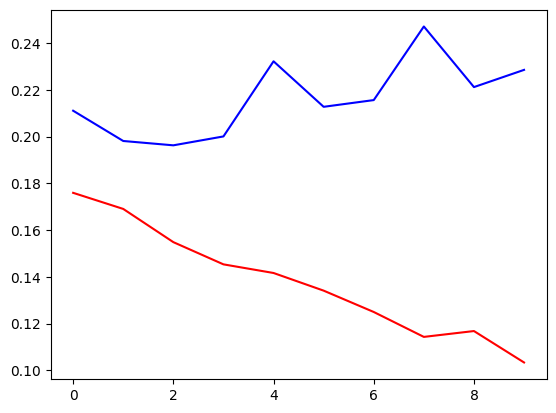

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],color = "red",label = "train")
plt.plot(history.history["val_loss"],color = "blue",label = "test")

In [ ]:
# Code Explanation:

# In this project, I implement a Convolutional Neural Network (CNN) for binary image classification (dogs vs cats) using TensorFlow, Keras, and a pre-trained VGG16 model. The VGG16 model, which has been trained on the ImageNet dataset, is used as the base for feature extraction, and custom fully connected layers are added on top for classification.

# Key steps in the implementation:

# Data Loading and Augmentation:

# I used ImageDataGenerator to perform data augmentation on the training dataset, which includes random transformations like shear, zoom, and horizontal flipping to improve the model's generalization.
# The test dataset is rescaled (pixel values between 0 and 1) to prepare for model evaluation.
# Transfer Learning with VGG16:

# VGG16 Pre-trained Model: The convolutional base of VGG16 is used without the fully connected layers (include_top=False). This allows us to leverage the pre-trained features from ImageNet for the current classification task.
# The convolutional base layers are frozen (trainable=False) to retain the learned features from ImageNet, and the custom dense layers are added for the final classification.
# Model Architecture:

# The model consists of the pre-trained VGG16 base followed by a Flatten layer to flatten the feature maps.
# A dense hidden layer with 256 units and ReLU activation is followed by an output layer with 1 unit and a sigmoid activation for binary classification.
# Model Compilation and Training:

# The model is compiled with the Adam optimizer, binary crossentropy loss, and accuracy as the evaluation metric.
# The model is trained for 10 epochs using the augmented training data with validation on the test dataset.
# Model Evaluation:

# Training and validation accuracy and loss are plotted to visualize model performance over the epochs.
# Technologies/Tools Used:

# TensorFlow: Framework for building and training the deep learning model.
# Keras: High-level API for creating the neural network.
# VGG16: Pre-trained model for transfer learning.
# ImageDataGenerator: For data augmentation and image preprocessing.
# Matplotlib: For visualizing training and validation performance.
# Key Features of the Implementation:

# Transfer Learning: Leveraging pre-trained VGG16 weights for feature extraction and fine-tuning the top layers for the current task.
# Data Augmentation: Helps in increasing the diversity of the training data, reducing overfitting.
# Binary Classification: Classifying images into two categories: dogs and cats.
# Visualization: Plots of training and validation accuracy and loss provide insights into the model’s performance.
# I would love to hear your thoughts or suggestions on improving the model. Feel free to share any feedback or ideas!

# #TensorFlow #Keras #VGG16 #TransferLearning #DeepLearning #ImageClassification #DataAugmentation #MachineLearning #ArtificialIntelligence #AI #DataScience #ComputerVision